# Python for Programmers

This is a crash course on Python for  people who have already some experience with programming (usually scripting languages such as MATLAB or R).

---
### Lesson Objectives:

* learn basic syntax (functions, loops)

* learn about Python's basic data structures and the differences between them
    - lists, strings, disctionaries, tuples

* learn how to munipulate data with numpy arrays

* learn how to create a simple Class and instantiate objects from it

* learn how to make simple plots


---
### Python's Types
![](pydatatypes.jpg)
Image from http://vinodsrivastava.com/Learning-Hub/



* Python's libraries provide additional data structures
* We can create our own data types
* We can create our own objects

We will learn about all this data types through processing some brain image datasets.

---
### Manipulating Numerical Data

We will work with a cross-sectional MRI dataset which was obtained from [here](http://www.oasis-brains.org/). Download the data from https://github.com/valentina-s/PythonForProgrammers/blob/master/data.zip. It is best to have a folder called `notebooks/` and `data/` in your lesson working directory.

We will use a Jupyter Notebook in this lesson. Jupyter Notebooks are great to get started, share results with collaborators, teach....

Other development environments: [Spyder](https://pythonhosted.org/spyder/), [PyCharm](https://www.jetbrains.com/pycharm/), [Atom](https://atom.io/) ...

To get started navigate to the `notebooks` directory in the terminal and type `jupyter notebook`.

Python's Libraries

![](PythonStack.png)
https://neurohackweek.github.io/introduction-to-nhw/#50

The scientific library [SciPy](https://scipy.org/scipylib/) contains a submodule [`ndimage`](http://docs.scipy.org/doc/scipy/reference/ndimage.html) which we will use to read the image files.

In [110]:
# importing submodule ndimage from library scipy
from scipy import ndimage

In [111]:
# reading an image file
image = ndimage.imread('../data/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif')

In [112]:
image 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [113]:
# the dimensions of the 2D array (rows,columns)
image.shape

(208, 176)

In [114]:
type(image)

numpy.ndarray

The core numerical library is called [NumPy](http://www.numpy.org/). We will load it with a nickname `np` for short.

In [115]:
import numpy as np

Let's calculate some summary statistics:

In [116]:
np.max(image)

191

In [117]:
image.max()

191

In [118]:
image.min()

0

In [119]:
image.mean()

63.9491368006993

In [120]:
image.std()

73.51293371228904

The core plotting library in Python is [`matplotlib`](http://matplotlib.org/).

In [121]:
import matplotlib.pyplot as plt
# telling the notebook to keep the plots inline (instead of opening in a new window)
% matplotlib inline 

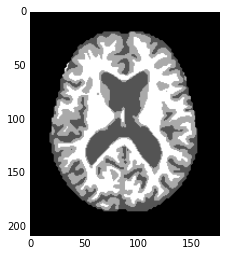

In [122]:
# displaying a two dimensional image
plt.imshow(image,cmap = 'gray')

In [123]:
# Accessing indivual elements
image[0,0]

0

In [124]:
# checking the type of the array's entries
type(image[100,100])

numpy.uint8

In Python indeces start from zero!

In [125]:
# extracting a part from the array
image[0:5,0:5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In Python the last index of a range is not read: i.e. here we read indeces `0,...,4`.

In [126]:
# let's extract half of this image
leftHemisphere = image[0:208,0:88]

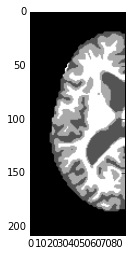

In [127]:
plt.imshow(leftHemisphere, cmap = 'gray')

In [128]:
leftHemisphere.shape

(208, 88)

In Python you can drop the first or the last index:

In [129]:
leftHemisphere = image[:208,:88]

In [130]:
leftHemisphere = image[:,:88]

We can also skip indeces:

In [131]:
#every other element:
small_image = image[0:208:2,0:176:2]

In [132]:
small_image.shape

(104, 88)

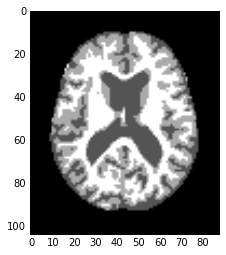

In [133]:
plt.imshow(small_image, cmap = 'gray')

In [134]:
# shortcut
small_image = image[::2,::2]

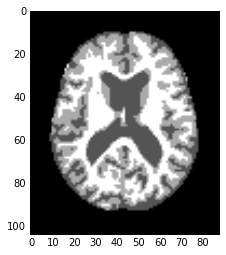

In [135]:
plt.imshow(small_image,cmap = 'gray')

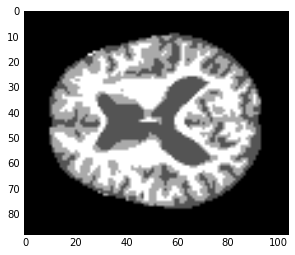

In [136]:
# we can transpose rows with columns
plt.imshow(small_image.T,cmap = 'gray')

From 2D to 1D.

In [137]:
image.flatten().shape

(36608,)

Or is it a 0D???

One dimensional arrays are neither row nor column vectors.

In [138]:
all_values = image.flatten()

In [139]:
imageSlice = image[180,:]

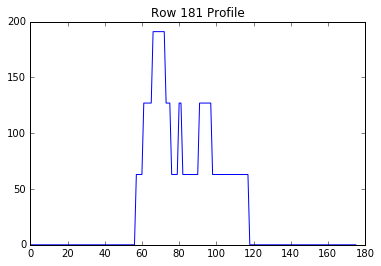

In [140]:
plt.plot(imageSlice)
plt.title('Row 181 Profile')

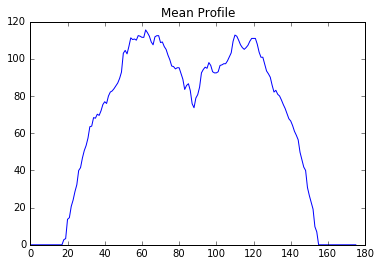

In [141]:
plt.plot(image.mean(axis = 0))
plt.title('Mean Profile')

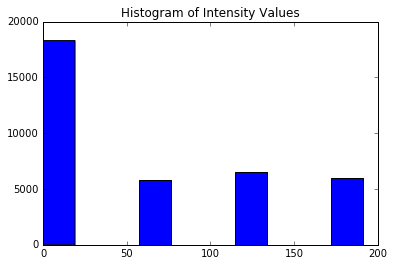

In [142]:
plt.hist(all_values)
plt.title('Histogram of Intensity Values')

We observe 4 levels of values. Let's explore these individual levels.

In [143]:
# let's look at the distinct intensity values
np.unique(all_values)

array([  0,  63, 127, 191], dtype=uint8)

In [144]:
# checking conditions
type((image == 0)[0,0])

numpy.bool_

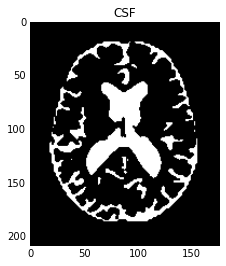

In [145]:
plt.imshow(image==63, cmap = 'gray')
plt.title('CSF')

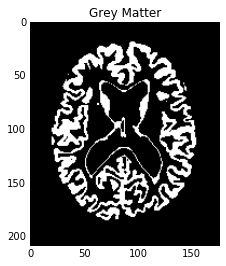

In [146]:
plt.imshow(image==127, cmap = 'gray')
plt.title('Grey Matter')

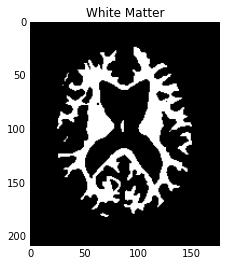

In [147]:
plt.imshow(image==191, cmap = 'gray')
plt.title('White Matter')

In [148]:
volume = sum(image==191)

In [149]:
volume = np.sum(image==191)

In [150]:
volume

6011

TODO: Counting from the end, any numpy array as indeces.

TODO: = vs. copy

---
### Creating Functions

In [151]:
def calculateRegionVolume(image,region):
    volume = np.sum(image == region)
    return(volume)

In [152]:
calculateRegionVolume(image,0)

18298

Exercise: make a function which calculates all 4 regions. Hint you can return more than one values. The function returns a tuple of values (more on this later).

In [153]:
def calculateVolumes(image):
    volume1 = np.sum(image == 63)
    volume2 = np.sum(image == 127)
    volume3 = np.sum(image == 191)
    return(volume1,volume2,volume3)

In [154]:
v1,v2,v3 = calculateVolumes(image)

In [155]:
print(v1,v2,v2)

5766 6533 6533


In [156]:
type(calculateVolumes(image))

tuple

*Tuple* is a special data structure in Python which hoolds a sequence of elements `(v1,v2,v3)`. 

TODO: change volume to percent (discuss division between python 2 and 3)

TODO: Explain Scope by removing region.

TODO: Show we can have default parameters, play with order.

TODO: help of functions, write help for my own functions

---
### Iterations: Lists and For-loops

We need something to iterate over: usually that is a Python's list.

In [157]:
myList = [1,2,3,4,5]

In [158]:
myList

[1, 2, 3, 4, 5]

In [159]:
## We can add more elements easily
myList.append(6)
myList

[1, 2, 3, 4, 5, 6]

What is the difference with numpy arrays?

We can put anything in lists:

In [160]:
mixedList = [1,'a',3,'avs',True]

In [161]:
type(mixedList[4])

bool

In [162]:
# we can even put another list
mixedList.append([1,23])

In [163]:
mixedList

[1, 'a', 3, 'avs', True, [1, 23]]

What is the difference with tuples?

In [164]:
myTuple = (1,2,3,4,5,6)

In [165]:
myList[2] = 5

In [166]:
# myTuple[2] = 5

In tuples you cannot change individual values!!! Tuples are called immutable, lists are mutable, numpy arrays are mutable.

Python For-loops = iterating over lists, or iterating over tuples, iterating over strings, or any other iterable object.

In [167]:
for item in mixedList:
    print(item)

1
a
3
avs
True
[1, 23]


The `range` function is very useful when working with loops.

In [168]:
for i in range(6):
    print(mixedList[i])

1
a
3
avs
True
[1, 23]


We have 44 patients and we want to calculate the volumes for all of them. We want to iterate over all image files in the folder. To extract a list of names for files in a folder matching a certain pattern, we can use a Python library called `blob`.

In [169]:
import glob

In [170]:
image_filenames = glob.glob('../data/*.gif')

In [171]:
image_filenames

['../data/OAS1_0012_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0002_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0013_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0009_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0035_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0022_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0007_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0005_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0011_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0029_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0028_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0030_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0014_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif',
 '../data/OAS1_0027_MR1_mpr_n4_anon_111_t88_masked_

Exercise: calculate the volume for the region with intensity 191 for all images and store these volumes in a list. 

Hint: you can initialize an emplty list with 

`l = []`

In [172]:
listOfVolumes = []
for filename in image_filenames:
    image = ndimage.imread(filename)
    listOfVolumes.append(calculateRegionVolume(image,191))

In [173]:
listOfVolumes

[6662,
 6464,
 5334,
 6838,
 5866,
 7331,
 7313,
 7088,
 7517,
 7064,
 6753,
 6364,
 7232,
 7926,
 7243,
 6874,
 6228,
 6320,
 7572,
 7318,
 6011,
 6815,
 6568,
 7023,
 7499,
 5977,
 6941,
 5005,
 7354,
 5811,
 5728,
 5213,
 6250,
 6869,
 7611,
 7492,
 7644,
 6898,
 5794]

Warning glob.glob may return results in different order!!!

How can we make the results safer and more clear?

We want to keep the name of the files: i.e. we need a mapping from the filename to the volume. We can use a dictionary data structure for that.

---
### Dictionaries

In [174]:
myDict = {'John':21,'Pamela': 32,'Eli':20}

In [175]:
# Accessing values
myDict['Pamela']

32

In [176]:
# the keys
myDict.keys()

dict_keys(['Pamela', 'Eli', 'John'])

In [177]:
# the values
myDict.values()

dict_values([32, 20, 21])

In [178]:
# keys and values
myDict.items()

dict_items([('Pamela', 32), ('Eli', 20), ('John', 21)])

In [179]:
# Create new elements:
myDict['Jim'] = 20

In [180]:
myDict

{'Eli': 20, 'Jim': 20, 'John': 21, 'Pamela': 32}

We see that the 'Jim' entry did not get attached in the end. Actually the elements are arranged in an alphabetical order of the keys.

Dictionary entries are not ordered!!!

In [181]:
# Empty Dictionary:
dictOfVolumes = {}

In [182]:
for filename in image_filenames:
    image = ndimage.imread(filename)
    dictOfVolumes[filename] = calculateRegionVolume(image,191)

In [183]:
dictOfVolumes

{'../data/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 6011,
 '../data/OAS1_0002_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 6464,
 '../data/OAS1_0003_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 6320,
 '../data/OAS1_0004_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 6815,
 '../data/OAS1_0005_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 7088,
 '../data/OAS1_0006_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 7354,
 '../data/OAS1_0007_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif': 7313,
 '../data/OAS1_0009_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 6838,
 '../data/OAS1_0010_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 5977,
 '../data/OAS1_0011_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 7517,
 '../data/OAS1_0012_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 6662,
 '../data/OAS1_0013_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': 5334,
 '../data/OAS1_0014_MR1_mpr_n4_anon_111_t88_masked_g

In [184]:
# let's show the elements
for key,value in dictOfVolumes.items():
    print(key,value)

../data/OAS1_0027_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 7926
../data/OAS1_0007_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif 7313
../data/OAS1_0039_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif 6228
../data/OAS1_0015_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif 6941
../data/OAS1_0013_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 5334
../data/OAS1_0038_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif 7572
../data/OAS1_0009_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 6838
../data/OAS1_0003_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 6320
../data/OAS1_0021_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 5728
../data/OAS1_0006_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 7354
../data/OAS1_0018_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 7492
../data/OAS1_0011_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif 7517
../data/OAS1_0026_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif 7318
../data/OAS1_0028_MR1_mpr_n4_anon_111_

In [185]:
# we can format the output a bit: string.find() function returns the index where the substring is found
for key,value in dictOfVolumes.items():
    print(key[key.find('OAS'):key.find('_mpr')],value)

OAS1_0027_MR1 7926
OAS1_0007_MR1 7313
OAS1_0039_MR1 6228
OAS1_0015_MR1 6941
OAS1_0013_MR1 5334
OAS1_0038_MR1 7572
OAS1_0009_MR1 6838
OAS1_0003_MR1 6320
OAS1_0021_MR1 5728
OAS1_0006_MR1 7354
OAS1_0018_MR1 7492
OAS1_0011_MR1 7517
OAS1_0026_MR1 7318
OAS1_0028_MR1 6753
OAS1_0034_MR1 7611
OAS1_0019_MR1 5794
OAS1_0029_MR1 7064
OAS1_0017_MR1 7243
OAS1_0022_MR1 7331
OAS1_0033_MR1 6898
OAS1_0014_MR1 7232
OAS1_0040_MR1 7023
OAS1_0035_MR1 5866
OAS1_0042_MR1 6250
OAS1_0037_MR1 7644
OAS1_0020_MR1 6874
OAS1_0005_MR1 7088
OAS1_0025_MR1 7499
OAS1_0004_MR1 6815
OAS1_0030_MR1 6364
OAS1_0041_MR1 6869
OAS1_0002_MR1 6464
OAS1_0031_MR1 5005
OAS1_0032_MR1 5213
OAS1_0010_MR1 5977
OAS1_0016_MR1 6568
OAS1_0012_MR1 6662
OAS1_0023_MR1 5811
OAS1_0001_MR1 6011


In [186]:
for filename in image_filenames:
    image = ndimage.imread(filename)
    dictOfVolumes[filename] = calculateVolumes(image)

In [187]:
dictOfVolumes

{'../data/OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (5766,
  6533,
  6011),
 '../data/OAS1_0002_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (3282,
  8564,
  6464),
 '../data/OAS1_0003_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (5369,
  6621,
  6320),
 '../data/OAS1_0004_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (3646,
  7849,
  6815),
 '../data/OAS1_0005_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (2537,
  8685,
  7088),
 '../data/OAS1_0006_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (2004,
  8952,
  7354),
 '../data/OAS1_0007_MR1_mpr_n3_anon_111_t88_masked_gfc_fseg_tra_90.gif': (2829,
  8168,
  7313),
 '../data/OAS1_0009_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (2727,
  8745,
  6838),
 '../data/OAS1_0010_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (6071,
  6262,
  5977),
 '../data/OAS1_0011_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif': (2924,
  7869,
  7517),
 '../data/OAS1_0012_MR1_mpr_n4

We want to plot the volumes for all subjects. The `plt.plot` function expects a list of x-coordinates and a list of y-coordinates.

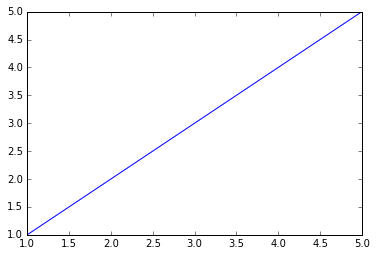

In [188]:
plt.plot([1,2,3,4,5],[1,2,3,4,5])

From list of volumes for each subject to list of volumes for each region: the `zip` function can help us.

In [189]:
v = list(zip(*list(dictOfVolumes.values())))
print(v)

[(2655, 2829, 5585, 5181, 7067, 2313, 2727, 5369, 6121, 2004, 3220, 2924, 3300, 4806, 1988, 6103, 2416, 2599, 4163, 4926, 2144, 3093, 5910, 5819, 3073, 3921, 2537, 1597, 3646, 4453, 4592, 3282, 8137, 6984, 6071, 6063, 3038, 5786, 5766), (7729, 8168, 6497, 6188, 5909, 8425, 8745, 6621, 6461, 8952, 7598, 7869, 7692, 6751, 8711, 6413, 8830, 8468, 6816, 6486, 8934, 8194, 6534, 6241, 7593, 7515, 8685, 9214, 7849, 7493, 6849, 8564, 5168, 6113, 6262, 5679, 8610, 6713, 6533), (7926, 7313, 6228, 6941, 5334, 7572, 6838, 6320, 5728, 7354, 7492, 7517, 7318, 6753, 7611, 5794, 7064, 7243, 7331, 6898, 7232, 7023, 5866, 6250, 7644, 6874, 7088, 7499, 6815, 6364, 6869, 6464, 5005, 5213, 5977, 6568, 6662, 5811, 6011)]


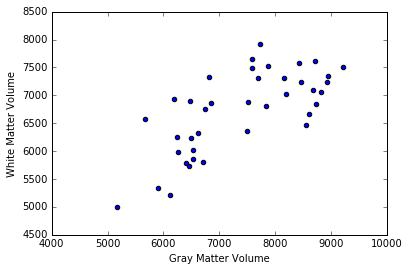

In [190]:
plt.scatter(v[1],v[2])
plt.xlabel('Gray Matter Volume')
plt.ylabel('White Matter Volume')

---
### Working with Text

Reading a text file:

In [191]:
f = open('../data/OAS1_0002_MR1.txt', 'r')

In [192]:
first_line = f.readline()
second_line = f.readline()

In [193]:
f.close()

In [194]:
len(second_line)

17

We can extract subsequences from strings as we extracted as we can subset numpy arrays and lists.

In [195]:
second_line[14:16]

'55'

Or we can count backwords:

In [196]:
second_line[-3:-1]

'55'

Exercise: create a function which extracts the age.

In [197]:
def extractAge(filename):
    f = open(filename, 'r')
    first_line = f.readline()
    second_line = f.readline()
    f.close()
    age = second_line[-3:-1]
    return(int(age))
   

In [198]:
extractAge('../data/OAS1_0002_MR1.txt')

55

---
### Classes

In [199]:
class neuroImage:
    image = image
    subjectID = 'OAS1_0002_MR1'
    def calculateVolumes(self):
        return(calculateVolumes(image))

In [200]:
nim = neuroImage()

In [201]:
nim.subjectID

'OAS1_0002_MR1'

In [202]:
nim.calculateVolumes()

(6103, 6413, 5794)

Initializing values of an object: adding a constructor.

In [203]:
class neuroImage:
    
    def __init__(self,subjectID):
        self.image = ndimage.imread('../data/'+subjectID+'_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif')
        self.subjectID = subjectID
        
    def calculateVolumes(self):
        return(calculateVolumes(image))

In [204]:
nim = neuroImage('OAS1_0002_MR1')

In [205]:
nim.subjectID

'OAS1_0002_MR1'

Exercise: create a list of objects of class neuroImage for each subject using the corresponding image file and metadata file with fields: image, subjectID, age.

In [206]:
metadata_filenames = glob.glob('../data/*.txt')
print(metadata_filenames)

['../data/OAS1_0023_MR1.txt', '../data/OAS1_0002_MR1.txt', '../data/OAS1_0030_MR1.txt', '../data/OAS1_0013_MR1.txt', '../data/OAS1_0011_MR1.txt', '../data/OAS1_0003_MR1.txt', '../data/OAS1_0027_MR1.txt', '../data/OAS1_0014_MR1.txt', '../data/OAS1_0019_MR1.txt', '../data/OAS1_0025_MR1.txt', '../data/OAS1_0026_MR1.txt', '../data/OAS1_0038_MR1.txt', '../data/OAS1_0009_MR1.txt', '../data/OAS1_0017_MR1.txt', '../data/OAS1_0016_MR1.txt', '../data/OAS1_0015_MR1.txt', '../data/OAS1_0040_MR1.txt', '../data/OAS1_0033_MR1.txt', '../data/OAS1_0020_MR1.txt', '../data/OAS1_0018_MR1.txt', '../data/OAS1_0010_MR1.txt', '../data/OAS1_0035_MR1.txt', '../data/OAS1_0004_MR1.txt', '../data/OAS1_0022_MR1.txt', '../data/OAS1_0041_MR1.txt', '../data/OAS1_0029_MR1.txt', '../data/OAS1_0028_MR1.txt', '../data/OAS1_0034_MR1.txt', '../data/OAS1_0006_MR1.txt', '../data/OAS1_0005_MR1.txt', '../data/OAS1_0042_MR1.txt', '../data/OAS1_0037_MR1.txt', '../data/OAS1_0039_MR1.txt', '../data/OAS1_0032_MR1.txt', '../data/OAS1

---
### Resources
[Python for MATLAB Users](https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html)

[Python for R Users](https://www.amazon.com/Python-R-Users-Ajay-Ohri/dp/1119126762)

[Tips on Code Style](http://docs.python-guide.org/en/latest/writing/style/)

[Software Carpentry Python Lesson](http://swcarpentry.github.io/python-novice-inflammation/)